In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def space(bounds, step):
    a,b = bounds
    while a <= b + step/10:
        yield a
        a+=step


In [42]:
def RK4(fn, y0, h=1e-5, bounds = (0,1)):
    t = space(bounds, h)
    k1 = lambda t,y: fn(t,y)
    k2 = lambda t,y: fn(t + h/2, y + h*k1(t,y)/2)
    k3 = lambda t,y: fn(t + h/2, y + h*k2(t,y)/2)
    k4 = lambda t,y: fn(t + h, y + h*k3(t,y))
    y=y0
    for tn in t:
        yield (tn, y)
        y = y + h/6*(k1(tn,y) + 2*k2(tn,y) + 2*k3(tn, y) + k4(tn,y))

def RK2(fn, y0, h=1e-5, bounds = (0,1)):
    t = space(bounds, h)
    k1 = lambda t,y: fn(t,y)
    k2 = lambda t,y: fn(t + h/2, y + h/2*k1(t,y))
    y=y0
    for tn in t:
        yield (tn, y)
        y = y + h*k2(tn,y)

In [43]:
f = lambda x,u: np.log(2*u + x) + u
dudxLargeStepRK4 = list(RK4(f, 1, 0.1))
dudxSmallStepRK4 = list(RK4(f, 1, 0.05))
dudxLargeStepRK2 = list(RK2(f, 1, 0.1))
dudxSmallStepRK2 = list(RK2(f, 1, 0.05))

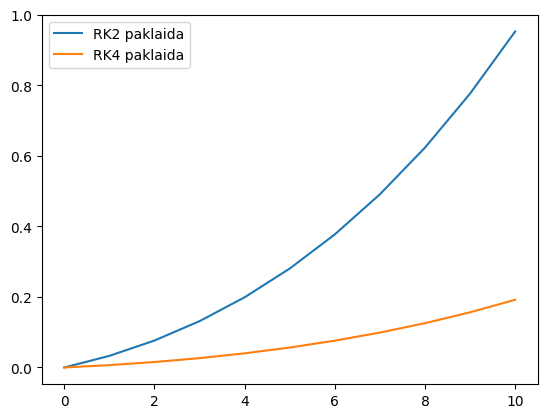

In [44]:
errRK4 = [abs(yt2 - yt)/(2**4-1) for (_,yt2),(_,yt) in zip(dudxLargeStepRK4, dudxSmallStepRK4)]
errRK2 = [abs(yt2 - yt)/(2**2-1) for (_,yt2),(_,yt) in zip(dudxLargeStepRK2, dudxSmallStepRK2)]
plt.plot(errRK2, label="RK2 paklaida")
plt.plot(errRK4, label="RK4 paklaida")
plt.legend()

Text(0.5, 1.0, 'RK-4')

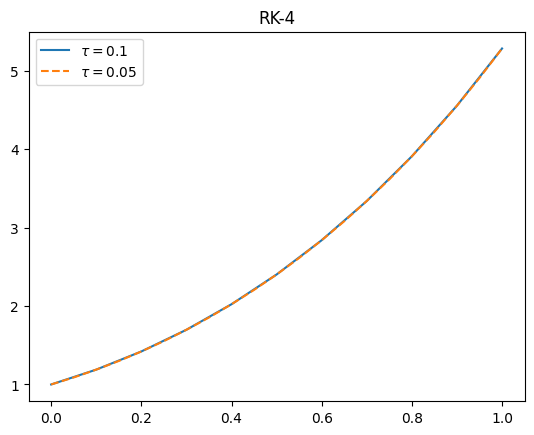

In [49]:
x,y = zip(*dudxLargeStepRK4)
plt.plot(x,y, label="$\\tau=0.1$")
x,y = zip(*dudxSmallStepRK4)
plt.plot(x,y, '--', label="$\\tau=0.05$")
plt.legend()
plt.title("RK-4")

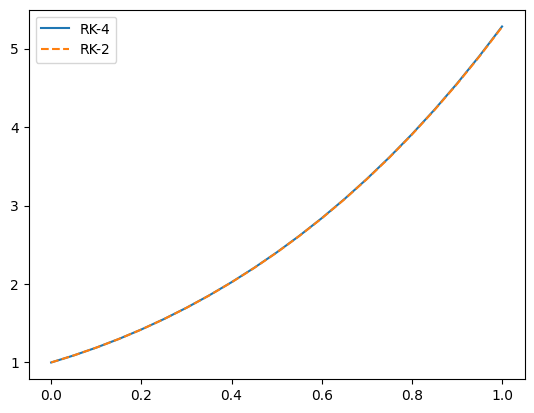

In [46]:
x,y = zip(*dudxSmallStepRK4)
plt.plot(x,y, label="RK-4")
x,y = zip(*dudxSmallStepRK2)
plt.plot(x,y, '--', label="RK-2")
plt.legend()